In [1]:
import sys
sys.path.append('./src')
import sciebo

sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/qmuIZfZC2bRe2iR', 'data/steinmetz_2016-12-14_Cori.nc')

In [2]:
import xarray as xr

In [3]:
dset = xr.load_dataset("./data/steinmetz_2016-12-14_Cori.nc")
dset

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 364, time: 250, cell: 734)
Coordinates:
  * mouse           (mouse) object 'Cori'
  * session_date    (session_date) object '2016-12-14'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int64 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734
Data variables: (12/24)
    contrast_left   (mouse, session_date, trial) int8 100 0 100 0 ... 0 25 100
    contrast_right  (mouse, session_date, trial) int8 0 50 50 0 ... 25 50 0 100
    gocue           (mouse, session_date, trial) float64 1.027 0.8744 ... nan
    stim_onset      (mouse, session_date, trial) float64 0.5 0.5 0.5 ... 0.5 0.5
    feedback_type   (mouse, session_date, trial) float64 1.0 1.0 1.0 ... nan nan
    feedback_time   (mouse, session_date, trial) float64 1.187 1.438 ... nan nan
    ...              ...
    spks            (mouse, session_date, cell, trial, time) int8 0 0 0 ... 0 0
    trough_to_peak  (mouse, session_date, cell) int8 19 19 10 17 ... 16 8 20 10
    ccf_ap          (mouse, session_date, cell) float64 4.09e+03 ... 8.914e+03
    ccf_dv          (mouse, session_date, cell) float64 2.445e+03 ... 4.094e+03
    ccf_lr          (mouse, session_date, cell) float64 5.012e+03 ... 3.021e+03
    brain_area      (mouse, session_date, cell) object 'ACA' 'MOs' ... 'DG'
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [4]:
dset["wheel"]

<xarray.DataArray 'wheel' (mouse: 1, session_date: 1, trial: 364, time: 250)>
array([[[[-1,  0,  0, ...,  1,  0,  1],
         [ 0, -1,  0, ...,  1,  0,  0],
         [ 0,  0, -1, ..., -1,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]]]], dtype=int8)
Coordinates:
  * mouse         (mouse) object 'Cori'
  * session_date  (session_date) object '2016-12-14'
  * trial         (trial) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364
  * time          (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.47 2.48 2.49 2.5

In [5]:
df = dset["wheel"].to_dataframe().reset_index()
df

,mouse,session_date,trial,time,wheel
0,Cori,2016-12-14,1,0.01,-1
1,Cori,2016-12-14,1,0.02,0
2,Cori,2016-12-14,1,0.03,0
3,Cori,2016-12-14,1,0.04,0
4,Cori,2016-12-14,1,0.05,0
...,...,...,...,...,...
90995,Cori,2016-12-14,364,2.46,0
90996,Cori,2016-12-14,364,2.47,0
90997,Cori,2016-12-14,364,2.48,0
90998,Cori,2016-12-14,364,2.49,0


In [6]:
df_new = df.set_index(["time", "trial"])["wheel"].unstack()
df_new

trial,1,2,3,4,5,6,7,8,9,10,...,355,356,357,358,359,360,361,362,363,364
time,,,,,,,,,,,,,,,,,,,,,
0.01,-1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0.02,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,0,-1,0,0,-1,0,0,1,0,...,0,0,0,1,-1,0,0,0,0,0
0.04,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.46,0,0,0,0,-7,1,0,0,0,0,...,0,0,0,-1,0,0,0,1,0,0
2.47,0,0,0,0,-6,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2.48,1,1,-1,0,-6,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_new[2]

time
0.01    0
0.02   -1
0.03    0
0.04   -1
0.05    0
       ..
2.46    0
2.47    0
2.48    1
2.49    0
2.50    0
Name: 2, Length: 250, dtype: int8

In [8]:
import seaborn as sns

<Axes: xlabel='time', ylabel='2'>

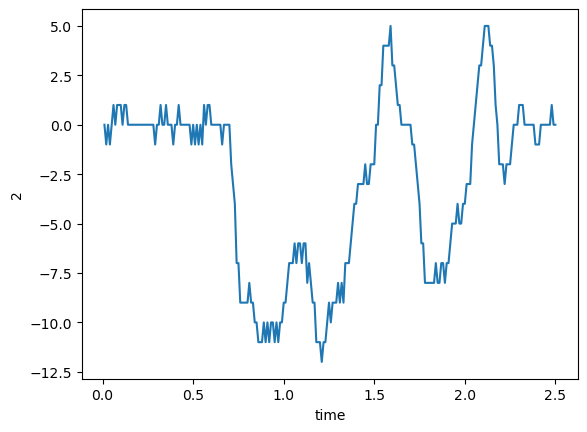

In [9]:
sns.lineplot(df_new[2])

<Axes: xlabel='time', ylabel='2'>

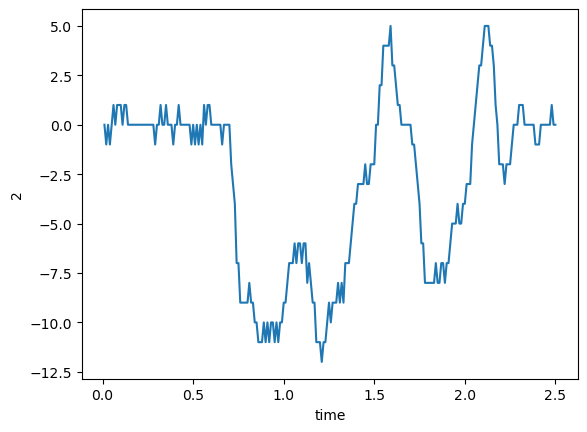

In [10]:
sns.lineplot(df_new[2])

<Axes: xlabel='time'>

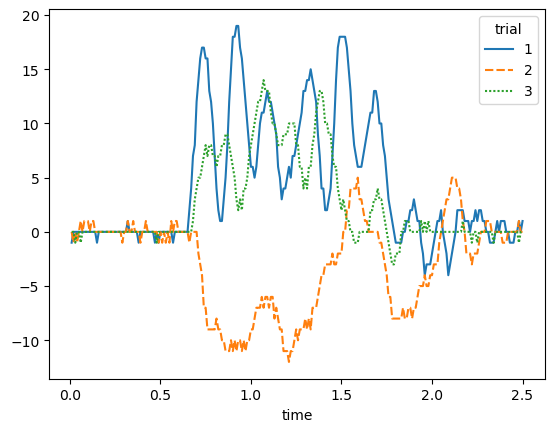

In [11]:
multiple_trials = [1, 2, 3]
sns.lineplot(df_new[multiple_trials])

---

In [12]:
df = dset["wheel"].to_dataframe().reset_index()
df

,mouse,session_date,trial,time,wheel
0,Cori,2016-12-14,1,0.01,-1
1,Cori,2016-12-14,1,0.02,0
2,Cori,2016-12-14,1,0.03,0
3,Cori,2016-12-14,1,0.04,0
4,Cori,2016-12-14,1,0.05,0
...,...,...,...,...,...
90995,Cori,2016-12-14,364,2.46,0
90996,Cori,2016-12-14,364,2.47,0
90997,Cori,2016-12-14,364,2.48,0
90998,Cori,2016-12-14,364,2.49,0


<Axes: xlabel='time', ylabel='wheel'>

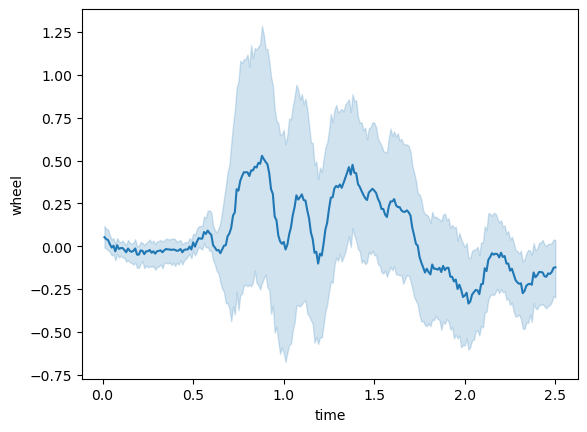

In [13]:
sns.lineplot(data=df, x="time", y="wheel")

In [14]:
cols = ["wheel", "contrast_left"]
df = dset[cols].to_dataframe().reset_index()
df

,mouse,session_date,trial,time,wheel,contrast_left
0,Cori,2016-12-14,1,0.01,-1,100
1,Cori,2016-12-14,1,0.02,0,100
2,Cori,2016-12-14,1,0.03,0,100
3,Cori,2016-12-14,1,0.04,0,100
4,Cori,2016-12-14,1,0.05,0,100
...,...,...,...,...,...,...
90995,Cori,2016-12-14,364,2.46,0,100
90996,Cori,2016-12-14,364,2.47,0,100
90997,Cori,2016-12-14,364,2.48,0,100
90998,Cori,2016-12-14,364,2.49,0,100


<Axes: xlabel='time', ylabel='wheel'>

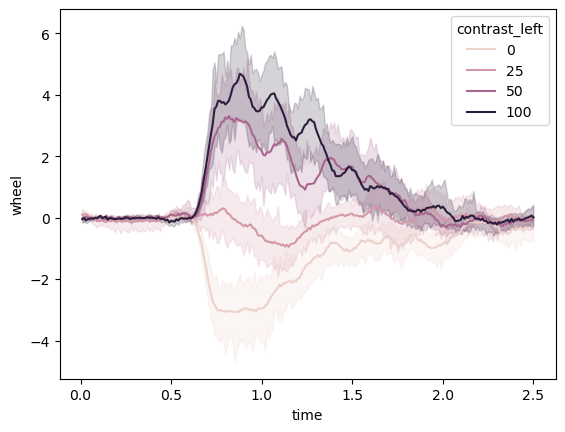

In [15]:
cols = ["wheel", "contrast_left"]
df = dset[cols].to_dataframe().reset_index()
sns.lineplot(data=df, x="time", y="wheel", hue="contrast_left", n_boot=50)

### Improve the plot further

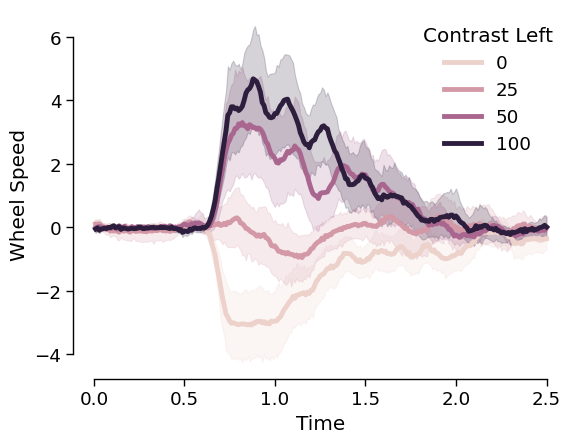

In [16]:
# Create the dataframe
cols = ["wheel", "contrast_left"]
df = dset[cols].to_dataframe().reset_index()


# Create Seaborn plot and save the figure
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 3.5})

sns_plot = sns.lineplot(data=df, x="time", y="wheel", hue="contrast_left", n_boot=500)
sns_plot.set(xlabel="Time")
sns_plot.set(ylabel="Wheel Speed")
sns_plot.legend_.set_title("Contrast Left")
sns_plot.legend_.set_frame_on(False)
sns.despine(trim=True)

sns_plot.figure.savefig("demo2.png", dpi=200, bbox_inches="tight")